In [1]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
import seaborn as sns

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix
import itertools






In [2]:
X=np.load('X.npy')
Y=np.load('Y.npy')

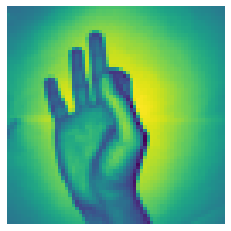

In [3]:
pl.imshow(X[0])
pl.axis('off')
pl.show()

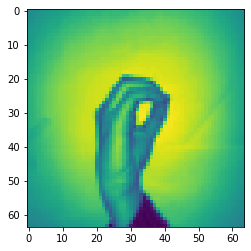

In [100]:
pl.imshow(X[300])

In [101]:
X[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [102]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [103]:
X=np.array([i.flatten() for i in X])

In [104]:
def onehot_tolabel(data):
    for i in range(len(data)):
        if data[i]==1.0:
            return i+1

In [105]:
# Y=np.array([onehot_tolabel(i) for i in Y])

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=41)

In [5]:
X_train.shape,y_test.shape

((1649, 64, 64), (413, 10))

In [118]:
model=Sequential()
model.add(Dense(units=4096,activation='sigmoid'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dense(64,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

In [114]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (1649, 4096)              16781312  
_________________________________________________________________
dense_34 (Dense)             (1649, 128)               524416    
_________________________________________________________________
dense_35 (Dense)             (1649, 64)                8256      
_________________________________________________________________
dense_36 (Dense)             (1649, 10)                650       
Total params: 17,314,634
Trainable params: 17,314,634
Non-trainable params: 0
_________________________________________________________________


In [119]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])
history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))


Train on 1649 samples, validate on 413 samples
Epoch 1/50
1649/1649 [==============================] - 2s 979us/step - loss: 2.3349 - accuracy: 0.0946 - val_loss: 2.3211 - val_accuracy: 0.0654
Epoch 2/50
1649/1649 [==============================] - 2s 911us/step - loss: 2.3098 - accuracy: 0.0898 - val_loss: 2.3073 - val_accuracy: 0.0654
Epoch 3/50
1649/1649 [==============================] - 2s 913us/step - loss: 2.3105 - accuracy: 0.1031 - val_loss: 2.3183 - val_accuracy: 0.0993
Epoch 4/50
1649/1649 [==============================] - 1s 908us/step - loss: 2.3114 - accuracy: 0.0904 - val_loss: 2.3126 - val_accuracy: 0.0896
Epoch 5/50
1649/1649 [==============================] - 2s 920us/step - loss: 2.3125 - accuracy: 0.0964 - val_loss: 2.3066 - val_accuracy: 0.1017
Epoch 6/50
1649/1649 [==============================] - 1s 910us/step - loss: 2.3061 - accuracy: 0.0964 - val_loss: 2.3355 - val_accuracy: 0.0654
Epoch 7/50
1649/1649 [==============================] - 2s 916us/step - loss:

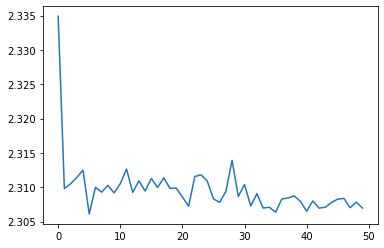

In [120]:
pl.plot(history.history['loss'])

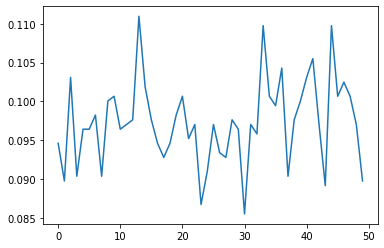

In [122]:
pl.plot(history.history['accuracy'])

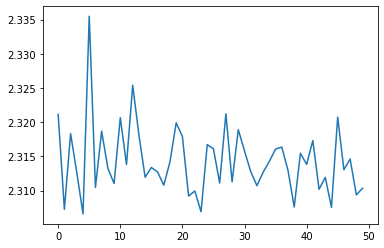

In [124]:
pl.plot(history.history['val_loss'])

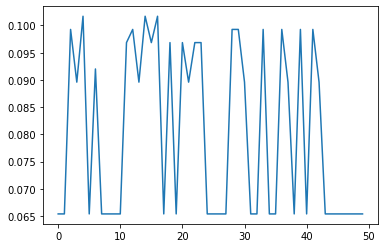

In [125]:
pl.plot(history.history['val_accuracy'])

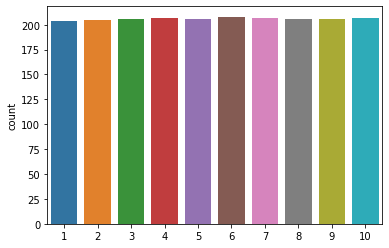

In [12]:
sns.countplot(lst_d)

In [6]:
X_train = X_train.reshape(-1,64,64,1)
X_test = X_test.reshape(-1,64,64,1)

In [7]:
X_train.shape

(1649, 64, 64, 1)

In [8]:
input_shape = X_train.shape[1:]

In [9]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 32, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 64, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 128, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Conv2D(filters = 256, kernel_size = (3,3) ,padding = "Same" ,activation = "relu",
                 input_shape =input_shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25) )

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(10, activation = 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0

In [11]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [12]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Epoch 1/100
40/52 [======================>.......] - ETA: 1s - loss: 2.4097 - accuracy: 0.2617

KeyboardInterrupt: 

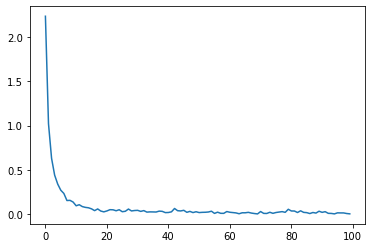

In [23]:
pl.plot(history.history['loss'])

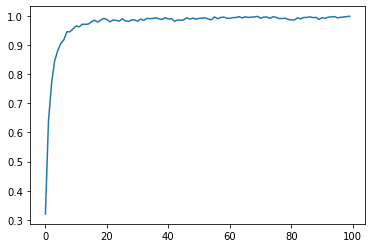

In [24]:
pl.plot(history.history['accuracy'])

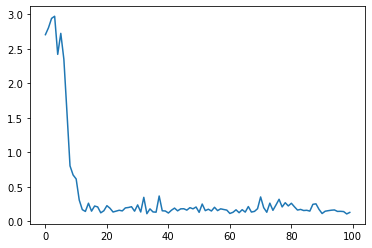

In [25]:
pl.plot(history.history['val_loss'])

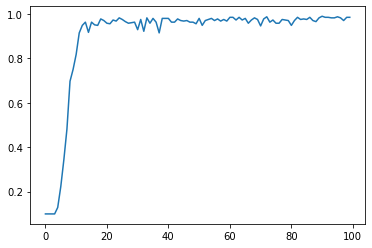

In [26]:
pl.plot(history.history['val_accuracy'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

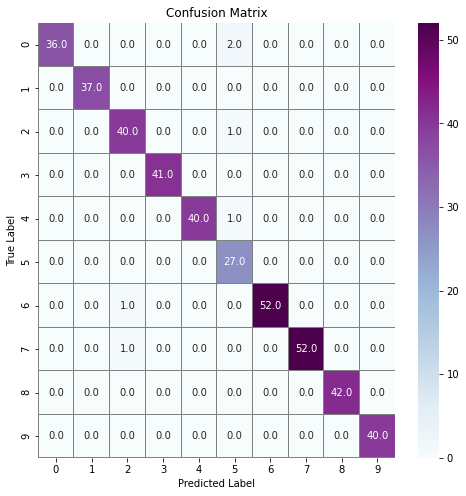

In [29]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

(4096,)